<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/KNN_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
# mnist 데이터를 불러온다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 28 x 28짜리 배열을 1차원으로 배열한 784짜리 데이터이며, 총 70,000개가 저장되어 있다.
# 데이터양이 많아 시간이 오래걸리기 때문에 짤라서 한다. 
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

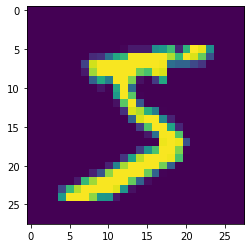

In [ ]:
# x_train[0]의 이미지를 확인한다.
plt.imshow(x_train[0])
plt.show()

In [ ]:
# shape을 변경한다. 3D --> 2D
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
x_train.shape

(5000, 784)

In [ ]:
x_test.shape

(1000, 784)

In [ ]:
# 0 ~ 1 사잇값으로 표준화 한다.
# 패션 MNIST의 경우 각 픽셀은 0~255 사이의 정수값을 가지며, 이런 이미지의 경우 보통 255로 나누어 0~1 사이의 값으로 정규화한다.
# 양수 값으로 이루어진 이미지를 전처리(Scaling)할 때 널리 사용하는 방법이다.
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# KNN 으로 Train 데이터 세트를 학습한다.
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
# accuracy = knn.score(testX, testY)와 동일함.
predY = knn.predict(x_test)
accuracy = (y_test == predY).mean()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)
print()

# Train 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
predY = knn.predict(x_train)
accuracy = (y_train == predY).mean()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % accuracy)

* 시험용 데이터로 측정한 정확도 = 0.91

* 학습용 데이터로 측정한 정확도 = 0.96


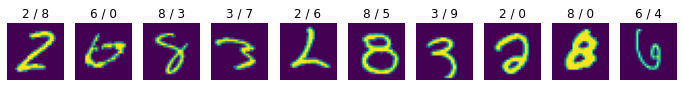

In [ ]:
# 잘못 분류한 이미지 몇개를 확인해 본다.
# 어떤 이미지를 잘 맞추지 못할까? 사람이라면 아래 이미지를 잘 맞출 수 있을까?
n_sample = 10
miss_cls = np.where(y_test != y_pred)[0]
miss_sam = np.random.choice(miss_cls, n_sample)

fig, ax = plt.subplots(1, n_sample, figsize=(12,4))
for i, miss in enumerate(miss_sam):
    x = x_test[miss] * 255  # 표준화 단계에서 255로 나누었으므로, 여기서는 곱해준다.
    x = x.reshape(28, 28)   # 이미지 확인을 위해 (28 x 28) 형태로 변환한다.
    ax[i].imshow(x)
    ax[i].axis('off')
    ax[i].set_title(str(y_test[miss]) + ' / ' + str(y_pred[miss]))
plt.show()

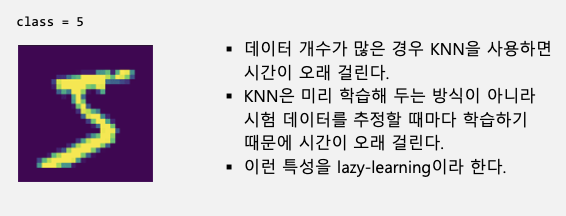